In [7]:
import json
import seaborn as sns 
import pprint as pp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics

In [8]:
def get_network_name(name):
    if "e+15+v+14" in name:
        return "microservices"
    if "e+1273+v+512" in name:
        return "AS"
    if "spokecommunitycircle" in name:  
        return "spoke community"
    if "communitycircle" in name:  
        return "community"
    if "circle" in name:  
        return "circle"
    if "foresthubandspoke" in name:
        return "forest hub & spoke"
    if "longforesthubandspoke" in name:
        return "long forest hub & spoke"
    if "longhubandspoke" in name:
        return "long hub & spoke"    
    if "hubandspoke" in name:
        return "hub & spoke"
    if "scalefree" in name:
        return "scalefree"
    if "smallworld" in name:
        return "smallworld"
    

In [9]:
def gen_graph(roundData, maxIter, cat, network, pf):
    x = list(range(maxIter))
    avgs = []
    medians = []
    stdev = []
    difsmax = []
    difsmin = []
    for k in roundData.keys():   
        lst = roundData[k]
        avg = sum(lst) / len(lst)
        med = statistics.median(lst)
        medians.append(med)
        avgs.append(avg)
        var = sum((x-avg)**2 for x in lst) / len(lst)
        std = var**0.5
        difsmin.append(avg +std)
        difsmax.append(avg-std)
        stdev.append(stdev)
    fig, ax = plt.subplots()
    ax.plot(x, avgs, '-')
    plt.ylim(0, 1)
    ax.fill_between(x, difsmin, difsmax, alpha=0.2)
    ax.set_xlabel('round number')  # Add an x-label to the axes.
    ax.set_ylabel(cat)  # Add a y-label to the axes.
    ax.set_title(network + " pf=" + pf)  # Add a title to the axes.
    #ax.legend()  # Add a legend.
    
    
def load_JSON(cat):
    folder = './jsonDataReport'
    roundData = {}
    import os    
    files = os.listdir(folder)
    for fname in files:
        with open(folder+'/'+fname, "r") as f:
            data = json.load(f)            
        network = get_network_name(fname)
        maxIter = int(data['maxIter'][0])
        pf = str(data['pf'][0])
        nhopsPrune = int(data['nhopsPrune'][0])        
        for i in range(maxIter):            
             df = pd.DataFrame(data[str(i)].values())             
             if i not in roundData:               
                 roundData[i] = []                    
             roundData[i].extend(df[cat].tolist())            
    return maxIter, roundData, network, pf

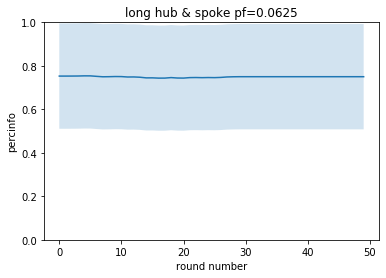

In [10]:
cat = 'percinfo'
maxIter, roundData, network, pf = load_JSON(cat)
gen_graph(roundData, maxIter, cat, network, pf)

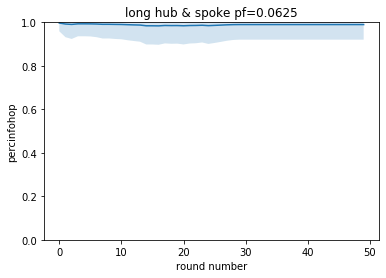

In [11]:
cat = 'percinfohop'
maxIter, roundData, network, pf = load_JSON(cat)
gen_graph(roundData, maxIter, cat, network, pf)